## 模拟退火算法

#### 流程图
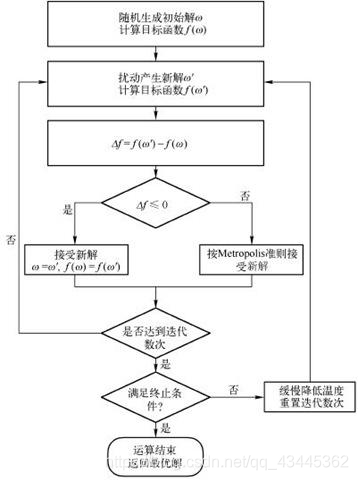  

### 过程


模拟退火（Simulated Annealing, SA）算法是一种基于物理退火过程的全局优化算法。在物理退火过程中，材料被加热到高温，然后逐渐冷却以达到最低能量状态。模拟退火算法通过模拟这一物理过程来解决优化问题，特别适用于复杂的多峰函数优化。

#### 1. 初始设置

首先，选择初始温度$ T_0 $，设定最终温度 $T_f$，并确定降温因子 $\alpha$。同时，随机生成初始解 (x, y)。

#### 2. 目标函数

我们定义目标函数  f(x, y)  如下：

$$ f(x, y) = - \left( \frac{6.452 \cdot (x + 0.125 \cdot y) \cdot (\cos(x) - \cos(2y))^2}{\sqrt{0.8 + (x - 4.2)^2 + 2 \cdot (y - 7)^2}} + 3.226 \cdot y \right) $$

要求目标函数的最大值，先加个负号求最小值

#### 3. 生成新解

在每一温度下，算法生成一个新的解 $ (x_{\text{new}}, y_{\text{new}}) $：

$$ x_{\text{new}} = x + T \cdot (\text{random()} - \text{random()}) $$

$$ y_{\text{new}} = y + T \cdot (\text{random()} - \text{random()}) $$

这个过程通过在当前解附近随机扰动来生成新解。

#### 4. Metropolis 准则

Metropolis 准则决定是否接受新解：

- 如果新解的目标函数值 $ f_{\text{new}} $更小（更优），则接受新解。
- 否则，以概率$ p $接受新解：

$$ p = \exp\left(\frac{f - f_{\text{new}}}{T}\right) $$


这种机制允许算法跳出局部最优，增加找到全局最优解的机会。

**所以算法求的是函数的最小值**

#### 5. 降温过程

每次迭代后，温度按照以下公式降低：

$$T_{\text{new}} = \alpha \cdot T $$

当温度降到设定的最终温度 $ T_f $时，算法停止。


在经典的模拟退火算法中，通常我们将 `K_B` 设置为 1，因为我们可以把温度 `T` 和 `K_B` 的乘积视为一个新的温度。因此，·`p = exp((f - f_new) / T)` 是可以接受的，并且简化了实现过程。

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

iter = 10
T0 = 300
Tf = 1e-8
alpha = 0.99




# 目标函数min
def func(x, y):
    num = 6.452 * (x + 0.125 * y) * (np.cos(x) - np.cos(2*y)) ** 2
    den = np.sqrt(0.8 + (x - 4.2) ** 2 + 2 * (y - 7) ** 2)
    return -(num / den + 3.226 * y)
    


# 计算最优解
def get_optimal(x, y):
    f_list = []
    for i in range(iter):
        f = func(x[i], y[i])
        f_list.append(f)
    f_best = min(f_list)
    idx = f_list.index(f_best)
    return - f_best, idx


# SA主函数
def SA(x, y):

    T = 100
    history = {'f':[], 'T': []}

    # 扰动产生新解
    def generate_new(x, y):
        while True:
            x_new = x + T * (random.random() - random.random())
            y_new = y + T * (random.random() - random.random())
            if (0 <= x_new <= 10) & (0 <= y_new <=10):
                break
        return x_new, y_new
        

    # Metropolis准则
    def Metropolis(f, f_new):
        if f_new <= f:
            return 1
        else:
            p = np.exp((f - f_new) / T)
            if random.random() < p:
                return 1
            else:
                return 0
    
    # 外循环
    while T > Tf:

        # 内循环
        for i in range(iter):
            f = func(x[i], y[i])
            x_new, y_new = generate_new(x[i], y[i])
            f_new = func(x_new, y_new)

            if Metropolis(f, f_new):
                x[i] = x_new
                y[i] = y_new

        # 降温
        T = T * alpha

        ft, _ = get_optimal(x, y)
        history['f'].append(ft)
        history['T'].append(T)


        # 得到最优解
    f_best, idx = get_optimal(x, y)
    print(f'F={f_best},x={x[idx]},y={y[idx]}')

    # 绘图
    def plot():
        fig, ax1 = plt.subplots()

        ax1.plot(history['T'], history['f'], 'b-')
        ax1.set_xlabel('Temperature')
        ax1.set_ylabel('Function Value', color='b')
        ax1.invert_xaxis()

        plt.title('Simulated Annealing Optimization')
        plt.show()

    plot()


if __name__ == '__main__':

    # 范围[0,10)
    x = [random.random() * 10 for _ in range(iter) ]
    y = [random.random() * 10 for _ in range(iter) ]    
    SA(x, y)


##### 注意事项
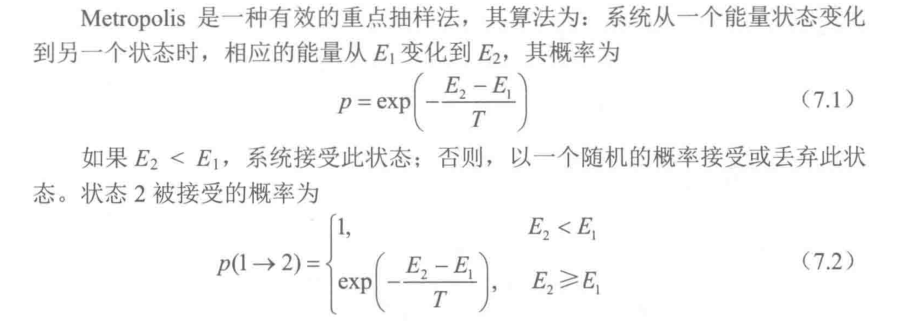  
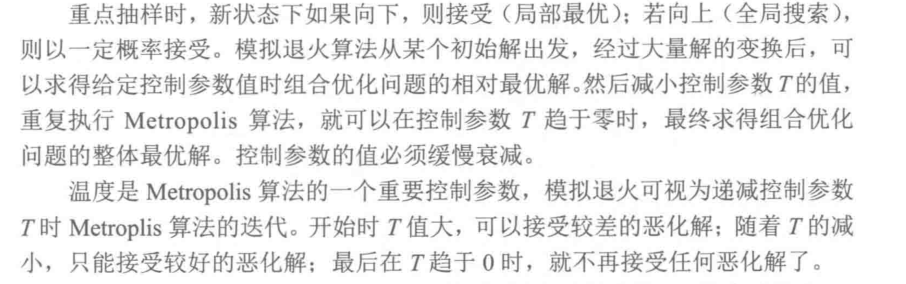  
到最后才收敛。而且误差较大

#### 使用模拟退火算法求解带约束的优化问题
通常用于求解非线性的优化问题，线性的优化问题直接用pulp即可。
在求解非线性规划问题时，需要给出初值猜测的原因有以下几点：

1. **非线性问题的复杂性**：非线性问题可能有多个局部极值点或根。初值猜测能够帮助算法在复杂的解空间中找到一个起点，以便更有效地收敛到一个解。

2. **数值方法的依赖性**：许多数值方法（如牛顿法、梯度下降法等）都依赖于初始点来开始迭代过程。这些方法在寻找极值或根时，需要一个起始点来进行迭代和更新。初值猜测影响算法的收敛速度和最终找到的解。

3. **避免陷入局部最优**：初值猜测可以影响算法是否能找到全局最优解。不同的初值可能会导致算法收敛到不同的局部最优点。因此，选择合适的初值非常重要，有时需要多次尝试不同的初值以增加找到全局最优解的可能性。

不过，智能优化算法（如遗传算法、粒子群优化、模拟退火等）确实能够在没有良好初值猜测的情况下，提供一种全局搜索的机制，以增加找到全局最优解的机会，而不完全依赖于初值猜测。

##### 引入惩罚项
在优化问题中，惩罚项（penalty term）是添加到目标函数中的额外部分，用于处理约束条件。主要目的是将约束优化问题转化为无约束优化问题，使得原来复杂的约束条件可以通过优化算法更容易地处理。惩罚项会在违反约束条件时施加额外的代价，从而引导优化过程向满足约束条件的方向发展。

以下是惩罚项的基本原理和常见类型：

##### 基本原理

假设我们有一个优化问题，其中包含一个目标函数 $ f(x) $ 和一组约束条件 $ g_i(x) \leq 0 $ 和 $ h_j(x) = 0 $ 。通过引入惩罚项，可以将原问题转化为一个新的目标函数 $ F(x) $，其形式为：

$$ F(x) = f(x) + P(x) $$

其中，$ P(x) $ 是惩罚项，用于对违反约束的情况施加惩罚。

##### 常见类型

1. **不可行性惩罚（外部惩罚）**：
    - 当解 $ x $ 不满足约束条件时，惩罚项 $ P(x) $ 会变得很大，从而使得优化算法倾向于避开这些不满足约束的区域。
    - 形式：$ P(x) = \sum_{i} \max(0, g_i(x))^2 + \sum_{j} h_j(x)^2 $
    - 缺点：初期可能无法找到可行解，即使找到可行解，也可能导致目标函数变得难以优化。

2. **可行性惩罚（内部惩罚）**：
    - 当解 $ x $ 接近违反约束时，惩罚项 $ P(x) $ 会逐渐变大，从而在可行区域内引导优化过程。
    - 形式：$ P(x) = \sum_{i} \frac{1}{g_i(x)} + \sum_{j} h_j(x)^2 $
    - 缺点：需要选择合适的惩罚参数，否则可能导致优化过程不稳定。

3. **障碍函数法**：
    - 在优化过程中，通过添加障碍函数，使解不能接近约束边界。
    - 形式：$ P(x) = -\sum_{i} \ln(-g_i(x)) $
    - 缺点：障碍函数法通常在无约束区域效果较好，但在接近约束边界时优化效率可能下降。


**优点**：
- 将约束优化问题转化为无约束优化问题，简化了问题的求解。
- 可以使用现有的无约束优化算法。

**缺点**：
- 需要选择合适的惩罚参数，过大或过小都会影响优化效果。
- 可能导致目标函数变得复杂。
- 需要平衡惩罚项与原目标函数之间的权重。


##### 题目
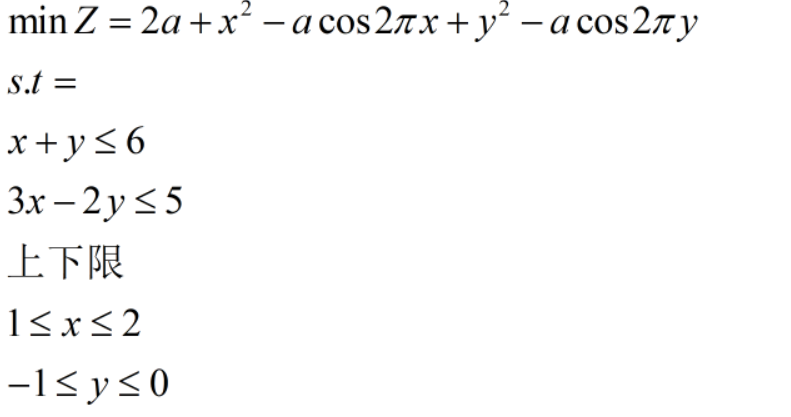

F_min=1.0000003991628468          
x=1.0000000076148445          
y=-0.0001360603959001013


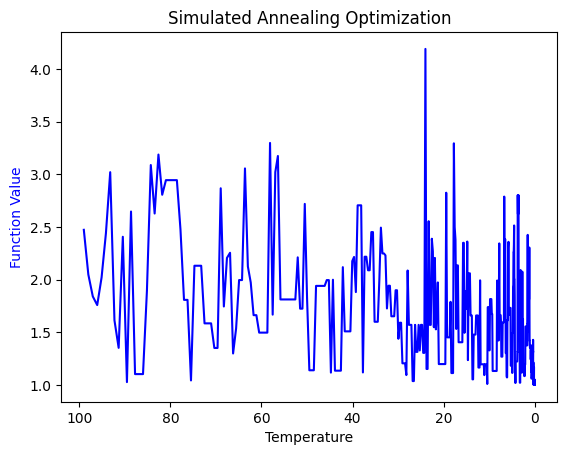

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt

iter = 10
T0 = 300
Tf = 1e-8
alpha = 0.99



# 目标函数min,加负号,求最大值
def func(x, y):

    return 2 + x**2 - np.cos(2*np.pi*x) + y**2 - np.cos(2*np.pi*y)
    


# 罚函数
def calc_p(x, y):
    ee =0

    e1 = 6 - x - y
    if e1 >=0:
        ee += 0
    else: 
        ee += e1**2
    
    e2 = 5 - 3*x +2*y

    if e2 >= 0:
        ee +=0
    else:
        ee += e2**2

    return ee


# 最后得到最优解
def get_optimal(x, y):
    f_list = []
    for i in range(iter):
        f = func(x[i], y[i])
        f_list.append(f)
    f_best = min(f_list)
    idx = f_list.index(f_best)
    return  f_best, idx


# SA主函数
def SA(x, y):

    c = 10
    T = 100
    history = {'f':[], 'T': []}

    # 扰动产生新解
    def generate_new(x, y):
        while True:
            x_new = x + T * (random.random() - random.random())
            y_new = y + T * (random.random() - random.random())
            if (1 <= x_new <= 2) & (-1 <= y_new <= 0):
                break
        return x_new, y_new
        

    # Metropolis准则 找的是小的那个函数
    def Metropolis(f, f_new):
        if f_new <= f:
            return 1
        else:
            p = np.exp((f - f_new) / T)
            if random.random() < p:
                return 1
            else:
                return 0
    
    # 外循环
    while T > Tf:

        # 内循环
        for i in range(iter):
            f = func(x[i], y[i]) + c * calc_p(x[i], y[i])
            x_new, y_new = generate_new(x[i], y[i])
            # 增加罚函数
            f_new = func(x_new, y_new) + c * calc_p(x_new, y_new)

            if Metropolis(f, f_new):
                x[i] = x_new
                y[i] = y_new
            

        # 降温
        c += 10
        T = T * alpha
        ft, _ = get_optimal(x, y)
        history['f'].append(ft)
        history['T'].append(T)


    # 得到最优解
    f_best, idx = get_optimal(x, y)
    print(f'F_min={f_best}\
          \nx={x[idx]}\
          \ny={y[idx]}')

    # 绘图
    def plot():
        fig, ax1 = plt.subplots()

        ax1.plot(history['T'], history['f'], 'b-')
        ax1.set_xlabel('Temperature')
        ax1.set_ylabel('Function Value', color='b')
        ax1.invert_xaxis()

        plt.title('Simulated Annealing Optimization')
        plt.show()

    plot()


if __name__ == '__main__':

    # 范围[0,10)
    x = np.random.uniform(1, 2, iter)
    y = np.random.uniform(-1, 0, iter)    
    SA(x, y)
